In [1]:
import numpy as np
import jwst
from jwst import datamodels

In [2]:
model=datamodels.open('/home/nmonnier/Data/JWST/Orion_bar/Fusion/Raw_slices/ch3b_ch4b_0210j_00003_mirifulong_cal.fits')
data = model.data

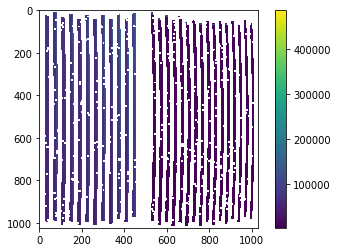

In [3]:
import matplotlib.pyplot as plt
data.shape
plt.figure()
plt.imshow(data)
plt.colorbar()

In [4]:
x_shape = data.shape[0]
y_shape = data.shape[1]

x_pixel_idx = np.arange(x_shape)
y_pixel_idx = np.arange(y_shape)

yy, xx = np.meshgrid(x_pixel_idx, y_pixel_idx)

detector2world = model.meta.wcs.get_transform('detector', 'world')

In [5]:
coordinates = detector2world(xx, yy)
test = detector2world(120,120)
binary_grid = np.zeros_like(data)
print(test)

(83.83361504415906, -5.417412102181762, 24.177041853495354)


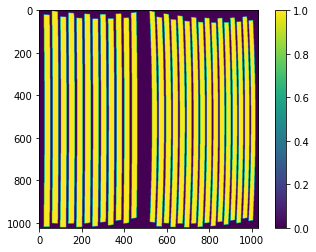

In [6]:
binary_grid[~np.isnan(coordinates[0].T)] = 1
plt.figure()
plt.imshow(binary_grid)
plt.colorbar()

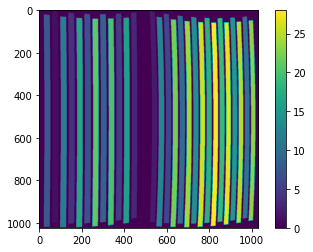

In [7]:
from skimage.measure import label

# Label connected components: Identify and label the white regions
label_image = label(binary_grid)
plt.imshow(label_image)
plt.colorbar()
plt.show()

In [17]:
for i in range(len(np.unique(label_image))):
    pixel_set = np.where(label_image == i)
    alpha, beta, lam = detector2world(pixel_set[1], pixel_set[0])
    print(f"Min = {np.min(lam)}, Max = {np.max(lam)}")


/home/nmonnier/anaconda3/envs/surfh/lib/python3.10/site-packages/gwcs/selector.py:572: UserWarning: The input positions are not inside any region.
  warnings.warn("The input positions are not inside any region.")
/home/nmonnier/anaconda3/envs/surfh/lib/python3.10/site-packages/gwcs/selector.py:486: UserWarning: All data is outside the valid range - None.
  warnings.warn("All data is outside the valid range - {0}.".format(self.name))


Min = nan, Max = nan
Min = 20.677960228951672, Max = 24.485134996077637
Min = 13.328364009297646, Max = 15.575465507467149
Min = 20.677894090007822, Max = 24.48512161288141
Min = 20.677876708570885, Max = 24.484902950869284
Min = 20.67795074490422, Max = 24.485022817136176
Min = 13.328384178308307, Max = 15.575452914217195
Min = 20.677980848825015, Max = 24.48508154182399
Min = 20.67820173828901, Max = 24.48511204164982
Min = 20.678056299567974, Max = 24.482801961368068
Min = 13.328406798541971, Max = 15.57545937854973
Min = 13.328458454566386, Max = 15.575435148910937
Min = 20.67782806506458, Max = 24.485099173020895
Min = 13.32842571254949, Max = 15.575436433730495
Min = 13.328419306067982, Max = 15.575431527233654
Min = 13.328368386150146, Max = 15.575410210770949
Min = 20.678085800250027, Max = 24.484988041432352
Min = 20.67805540020183, Max = 24.484991151076127
Min = 13.32844658470425, Max = 15.575455212237602
Min = 13.328421905586369, Max = 15.575451184547571
Min = 20.67792495297

array([24.485135  , 24.48171406, 24.48226299, ..., 20.67841346,
       20.67879833, 20.67918678])

17912
[83.83637375 83.83639112 83.83640848 ... 83.83626104 83.83627833
 83.83629562]
83.83638136778889
0.0003124972928958414


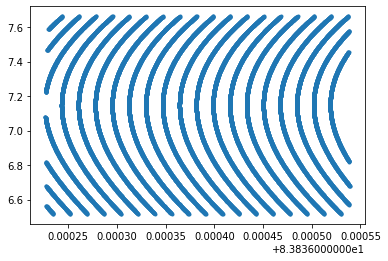

In [9]:
print(len(np.unique(lam)))
sorted_lam = np.sort(lam)
print(alpha)
print(np.mean(alpha))
print(np.max(alpha)-np.min(alpha))
plt.plot(alpha, lam, '.')

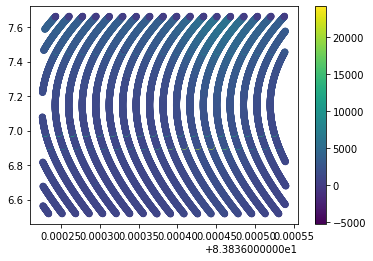

Min alpha is 83.83622662239941, Max alpha is 83.8365391196923


In [10]:
intensity = data[pixel_set]
sc = plt.scatter(alpha, lam, c=intensity)
plt.colorbar(sc)
plt.show()
world2detector = model.meta.wcs.get_transform('world', 'detector')
world2detector(alpha[0], beta[0], lam[0])
print(f'Min alpha is {np.min(alpha)}, Max alpha is {np.max(alpha)}')

In [11]:
model.meta.wcsinfo

In [12]:
# Extract coordinates for each label
set_1 = np.where(label_image==1)
set_3 = np.where(label_image==3)

plt.figure()
for slit in range(len(np.unique(label_image))):
    print(f"Idx = {slit}")
    if slit == 0:
        continue
    pixel_set = np.where(label_image==slit)
    alpha, beta, lam = detector2world(pixel_set[1][slit],pixel_set[0][slit])
    if lam > 9:
        continue

    list_alpha = []
    list_beta = []
    for idx in range(len(set_1[0])):
        alpha, beta, lam = detector2world(pixel_set[1][idx],pixel_set[0][idx])
        list_alpha.append(alpha)
        list_beta.append(beta)

    plt.plot(list_alpha, list_beta, '.')


Idx = 0
Idx = 1


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>